In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('C:/Users/ASUS/Downloads/Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:

df.shape

(9240, 37)

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [8]:
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


In [9]:
df.drop('prospect_id', axis = 1, inplace = True)

In [10]:

df_obj = df.select_dtypes(include='object')


s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


In [11]:

sel_cols = ['specialization', 'source', 'lead_profile', 'city']


df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

In [12]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

In [13]:
#Drop columns that have null values > 40% or Sales generated columns

df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [14]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [15]:
df.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

In [16]:
df.drop('country', axis = 1, inplace = True)

In [17]:
df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

In [18]:
df.drop('course_selection_reason', axis = 1, inplace = True)

In [19]:
df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

In [20]:

df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [21]:
df.occupation.value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: occupation, dtype: float64

In [22]:

df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

In [23]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [24]:

df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'


df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'


df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [25]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: specialization, dtype: float64

In [26]:

df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

In [27]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

In [28]:

df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'


df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [29]:
df.city.value_counts(normalize = True) * 100

Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: city, dtype: float64

In [30]:

df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

In [31]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [32]:

for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [33]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [34]:

df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

In [35]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.88
API                        38.74
Lead Add Form and Others    8.38
Name: lead_origin, dtype: float64

In [36]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [37]:
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [38]:
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [39]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Other Social Sites    3.79
Name: lead_source, dtype: float64

In [40]:
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [41]:

df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]


for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



In [42]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df.drop(drop_bin, axis = 1, inplace = True)

In [43]:
df.lead_number = df.lead_number.astype('object')

In [44]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

In [45]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


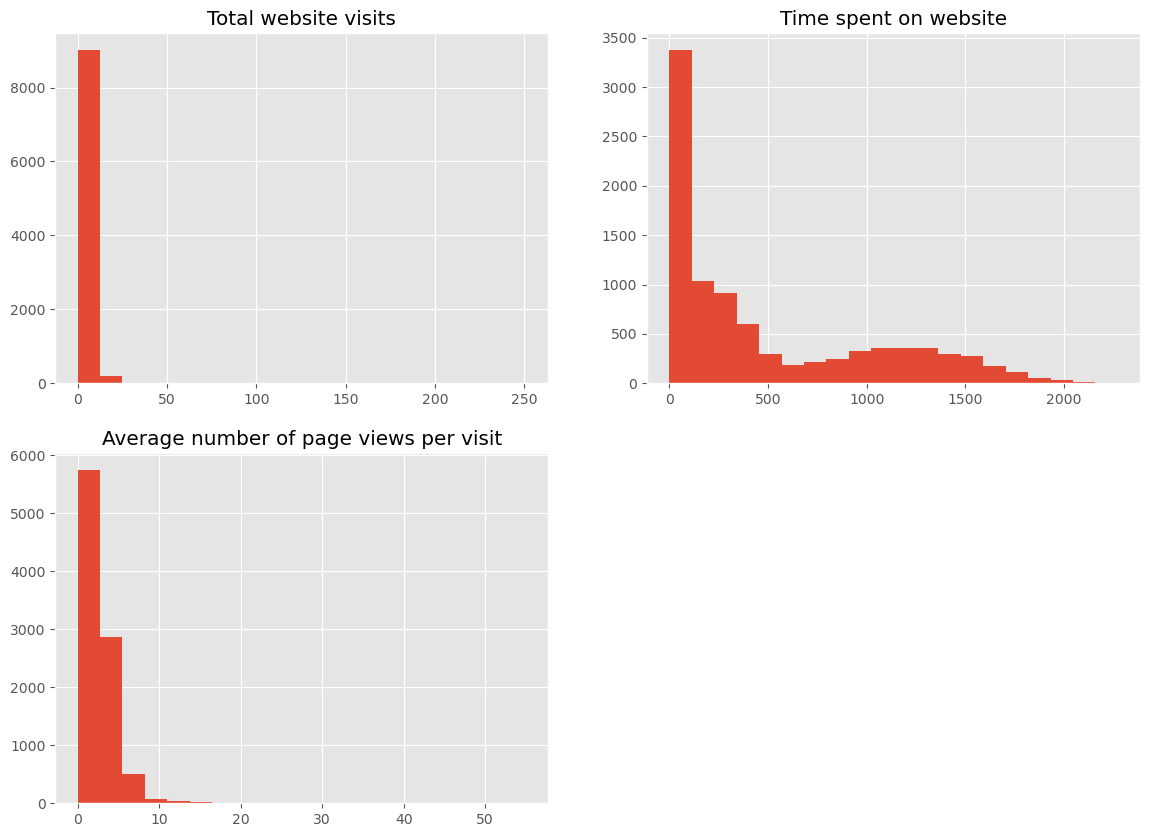

In [47]:

plt.style.use('ggplot')


fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

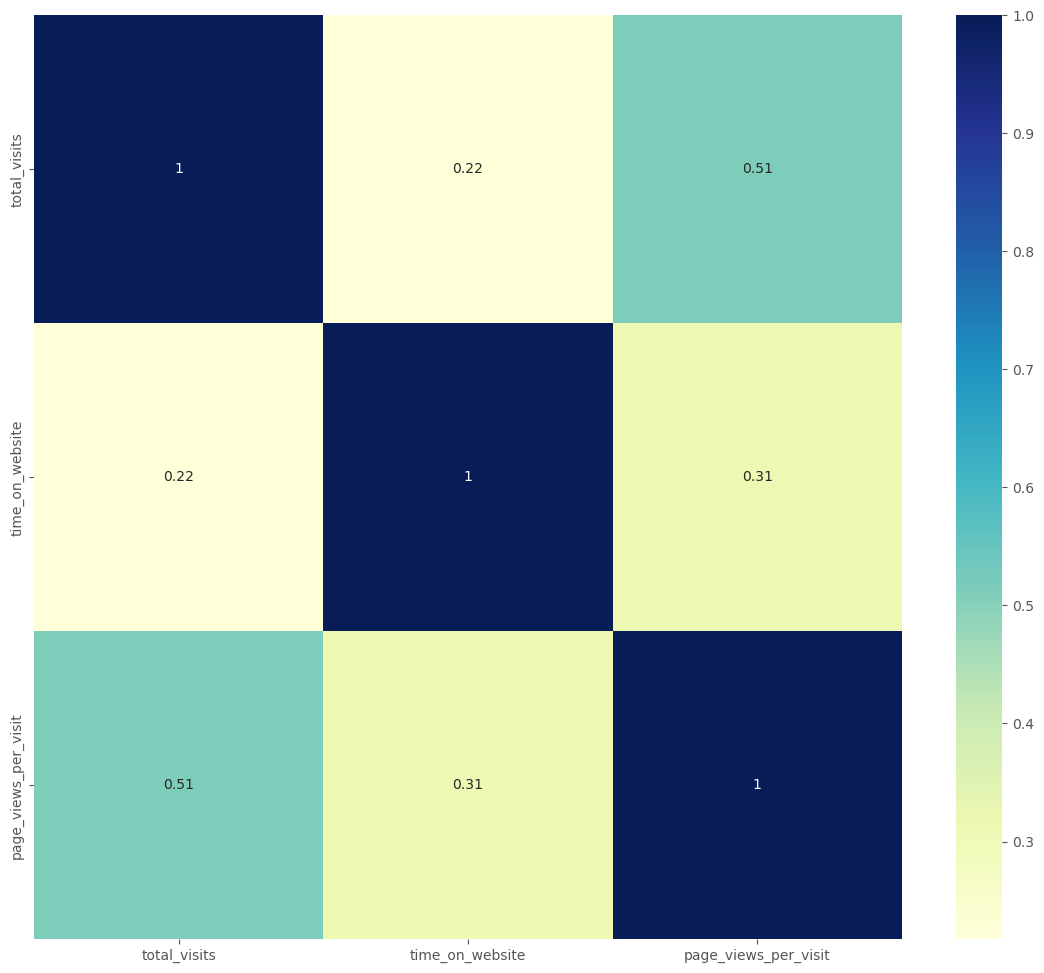

In [48]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

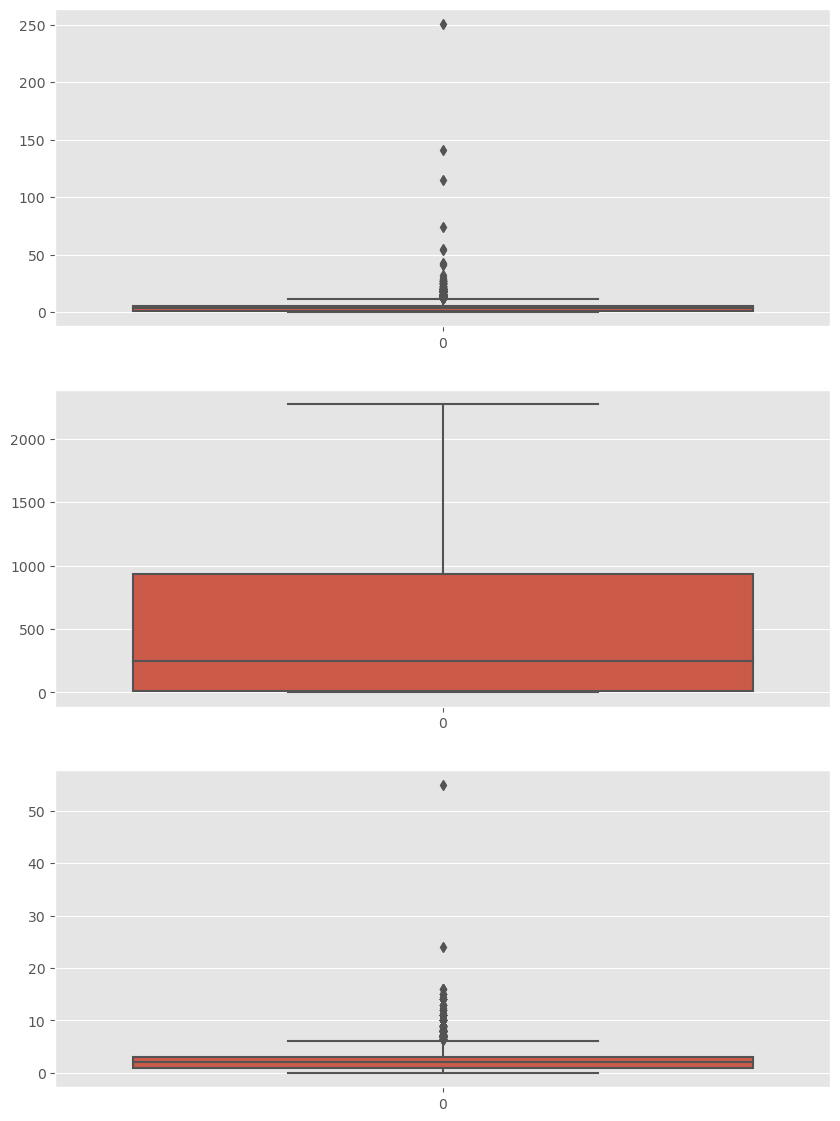

In [49]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

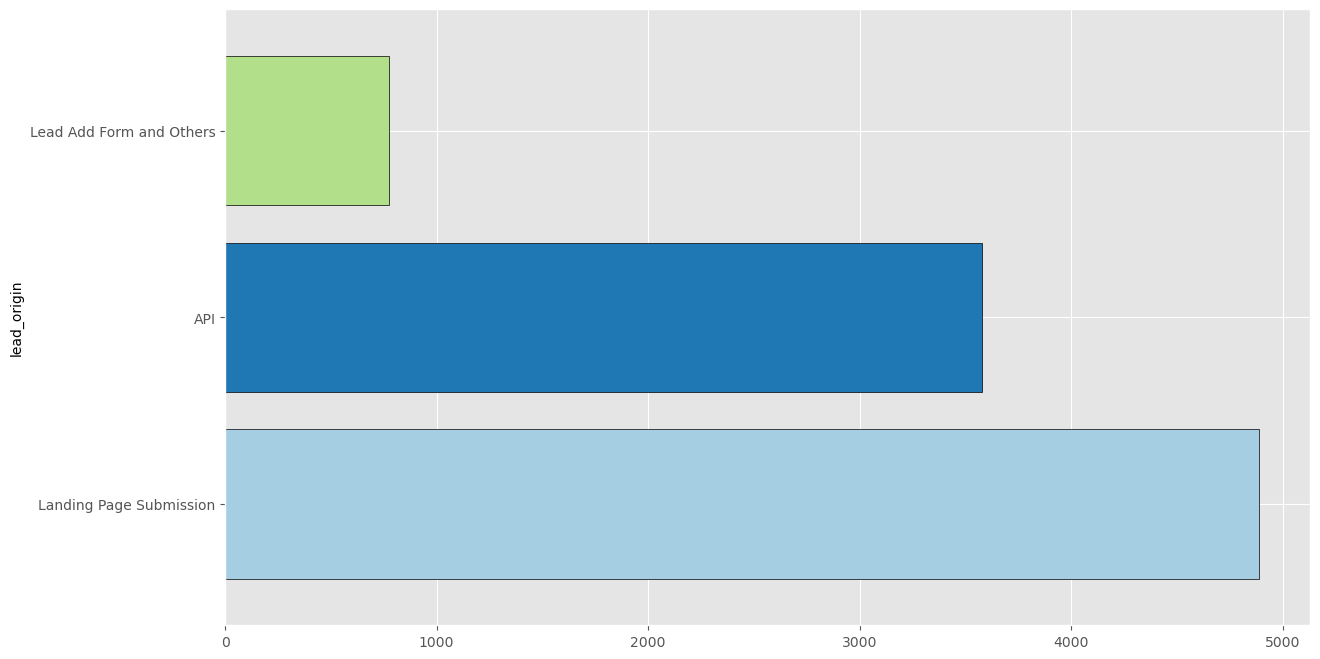

In [50]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [51]:
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.00,Management Specializations,Unemployed,Non-Maharashtra Cities,No


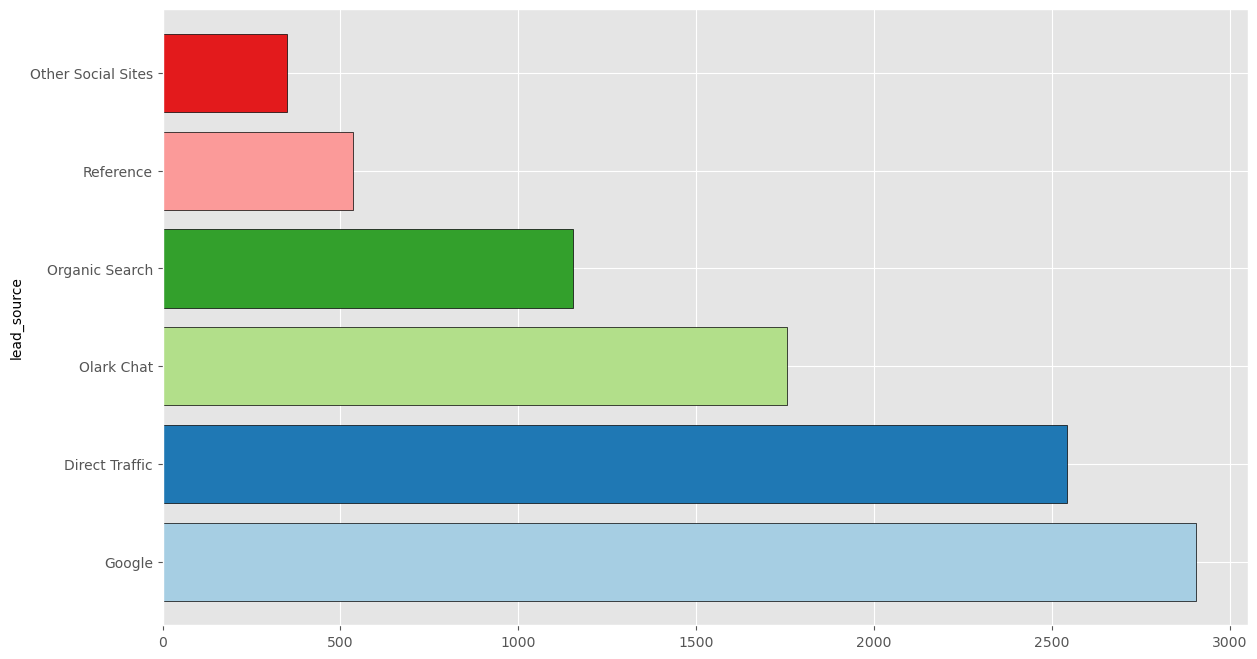

In [52]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

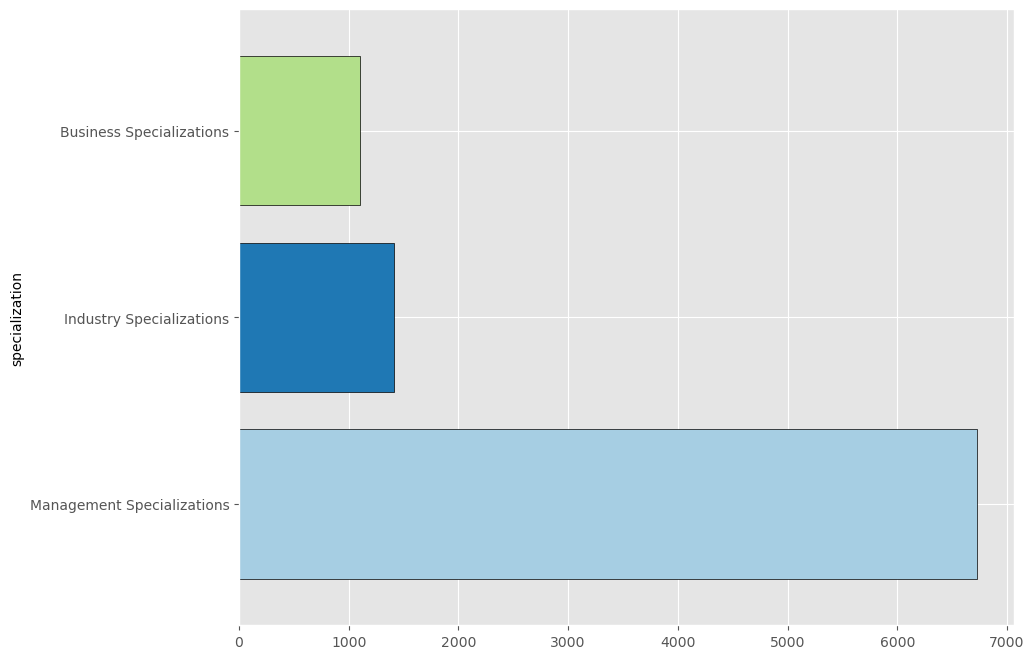

In [53]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

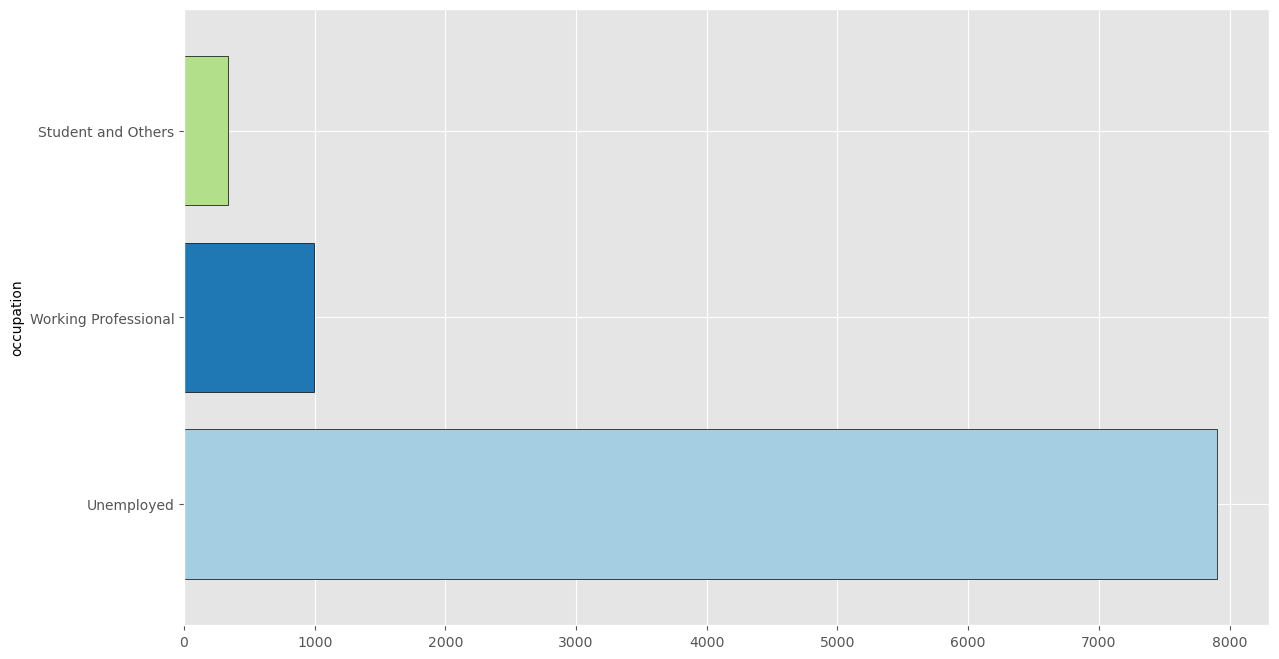

In [54]:
plt.figure(figsize = (14, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

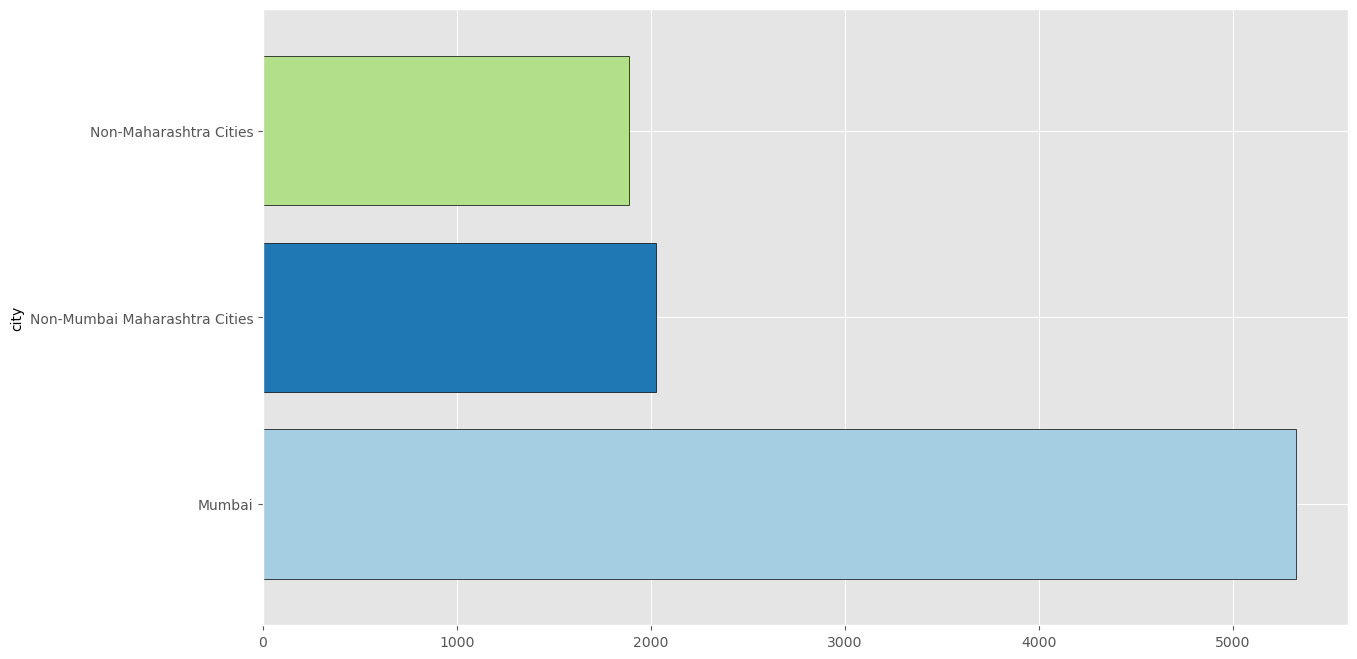

In [55]:
plt.figure(figsize = (14, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

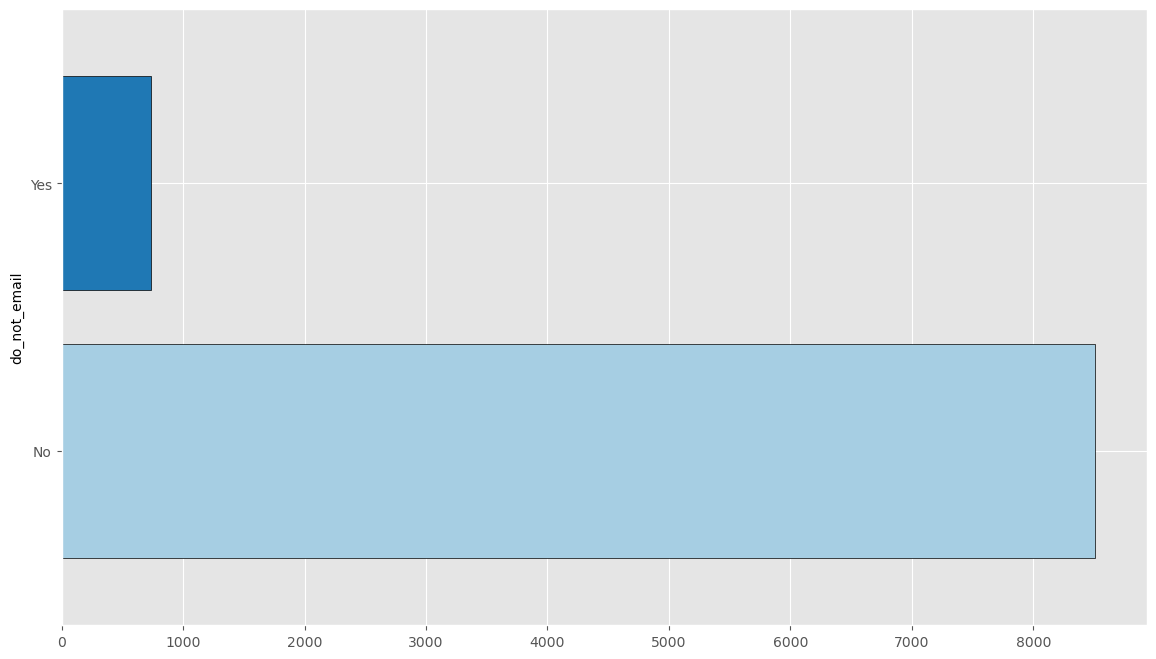

In [56]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

In [57]:
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


In [58]:
binlist = ['do_not_email', 'mastering_interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


df[binlist] = df[binlist].apply(binary_map)


df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Management Specializations,Unemployed,Non-Maharashtra Cities,0
1,660728,API,Organic Search,0,0,5,674,2.50,Management Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Management Specializations,Unemployed,Mumbai,0


In [59]:

dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)


df = pd.concat([df, dummy1], axis=1)

In [60]:
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,1,0
1,660728,0,0,5,674,2.50,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,660727,0,1,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.00,0,1,0,1,0,0,0,0,0,1,1,0,0,0


In [61]:
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

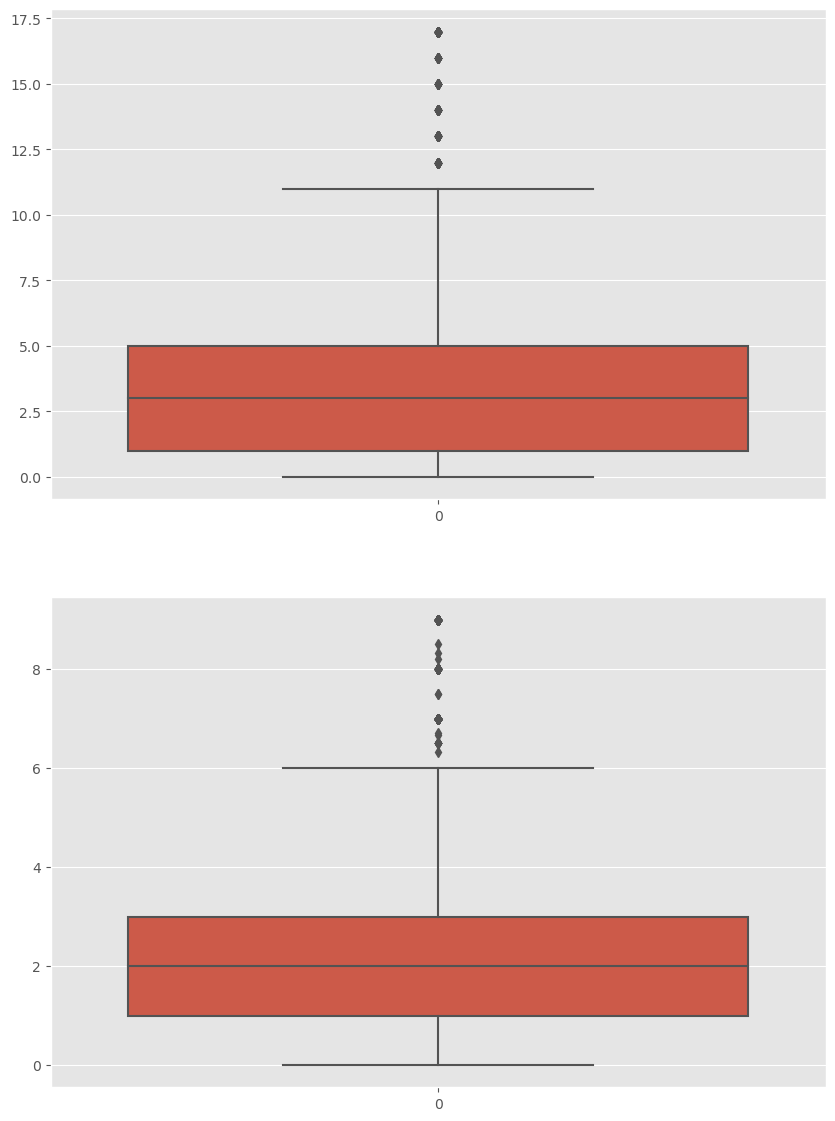

In [62]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

In [63]:

X = df.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,1,0


In [64]:

y = df['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,0,0.21,0.01,-0.50,1,1,0,0,0,0,0,0,0,0,1,0,1,0
3516,0,0.51,-0.69,0.09,0,0,0,0,1,0,0,0,0,1,1,0,0,0
8105,0,0.51,1.37,1.36,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,1


In [67]:
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

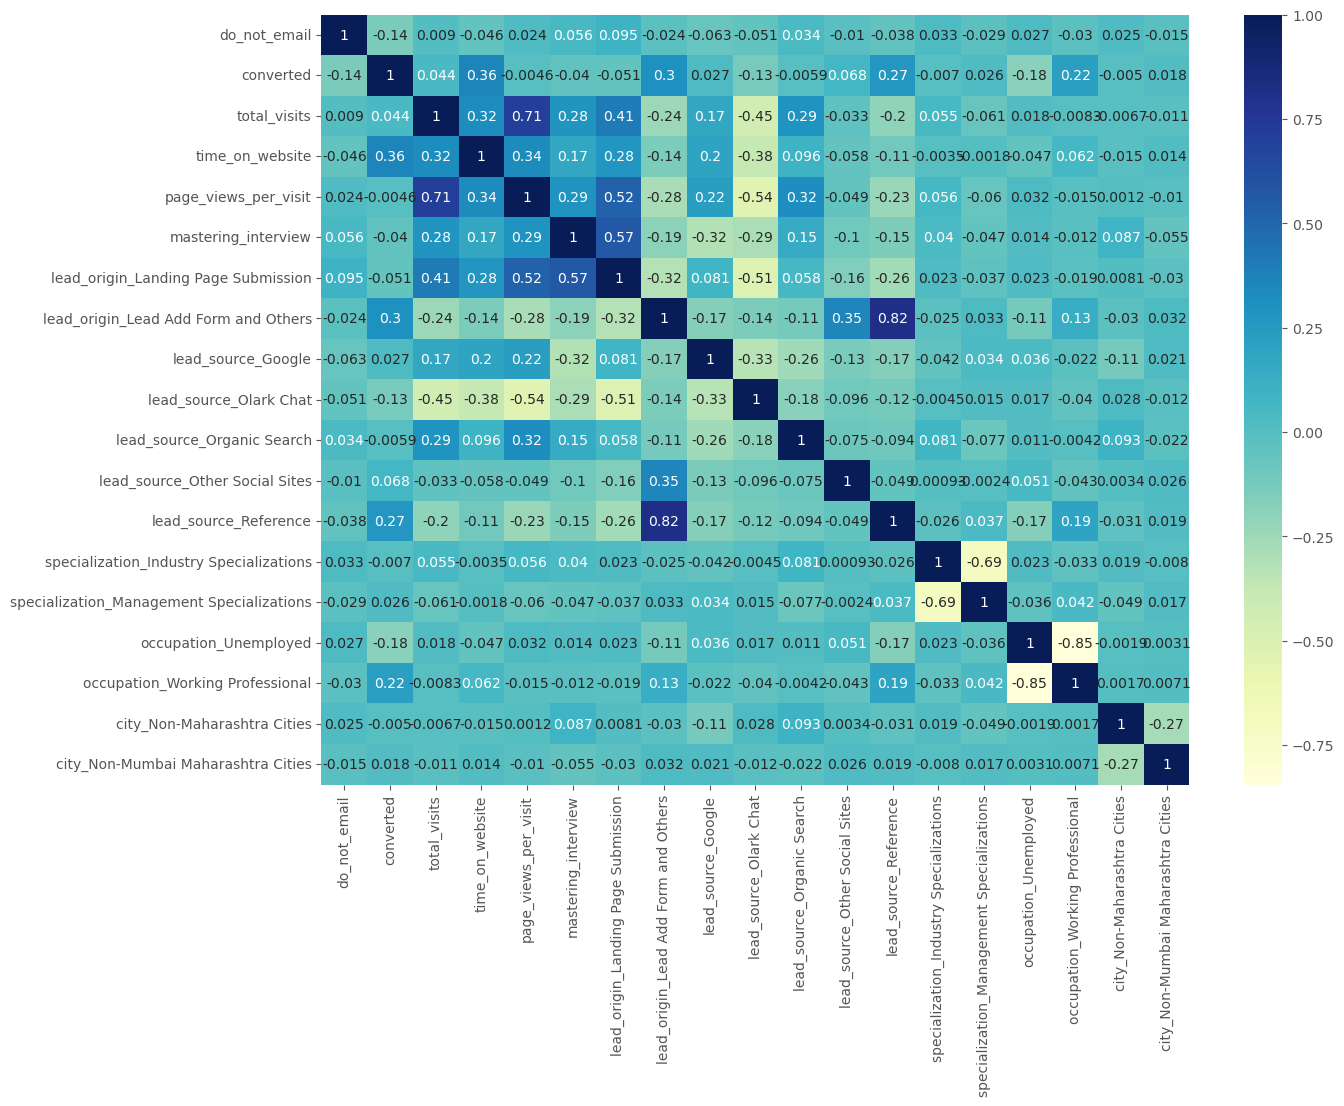

In [68]:
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [69]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

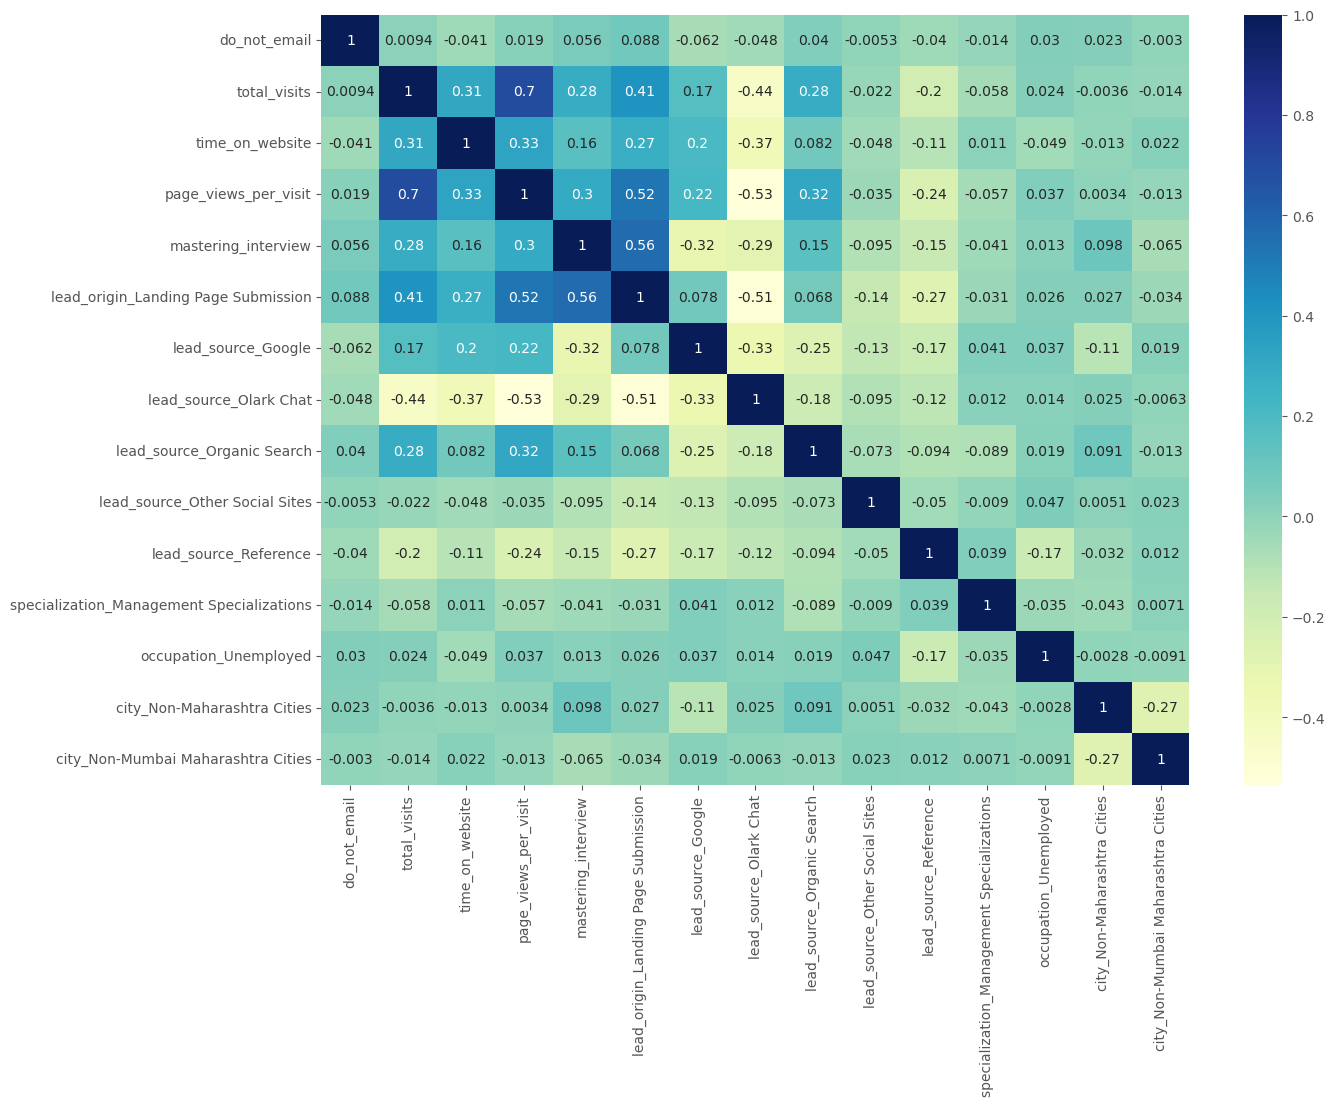

In [70]:
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [71]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.6
Date:                Mon, 19 Feb 2024   Deviance:                       6591.1
Time:                        16:59:04   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2668
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2349      0.147     -1.595      0.111      -0.524       0.054
do_not_email                                 -1.2354      0.145     -8.526      0.000      -1.519      -0.951
total_visits                                  0.1403      0.042      3.349      0.001       0.058       0.222
time_on_website                               1.0435      0.036     29.267      0.000       0.974       1.113
page_views_per_visit                         -0.1804      0.048     -3.725      0.000      -0.275      -0.085
mastering_interview                          -0.0149      0.094     -0.159      0.874      -0.199       0.169
lead_origin_Landing Page Submission          -0.0072      0.092     -0.078      0.938      -0.188       0.174
lead_source_Google                            0.3667      0.100      3.649      0.000       0.170       0.564
lead_source_Olark Chat                        0.6528      0.137      4.770      0.000       0.385       0.921
lead_source_Organic Search                    0.2125      0.116      1.831      0.067      -0.015       0.440
lead_source_Other Social Sites                1.6416      0.175      9.362      0.000       1.298       1.985
lead_source_Reference                         3.9485      0.221     17.844      0.000       3.515       4.382
specialization_Management Specializations     0.0111      0.069      0.160      0.873      -0.124       0.147
occupation_Unemployed                        -0.9504      0.086    -11.014      0.000      -1.119      -0.781
city_Non-Maharashtra Cities                   0.1316      0.079      1.666      0.096      -0.023       0.287
city_Non-Mumbai Maharashtra Cities            0.0192      0.076      0.252      0.801      -0.130       0.169
=============================================================================================================
"""

In [72]:
# initiate logistic regression
logreg = LogisticRegression()

num_features_to_select = 15
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)       
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', True, 1),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', True, 1),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [75]:
# assign columns
col = X_train.columns[rfe.support_]

In [76]:
X_train = X_train[col]

In [77]:
# Import statsmodels

import statsmodels.api as sm

In [78]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.6
Date:                Mon, 19 Feb 2024   Deviance:                       6591.1
Time:                        16:59:05   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2668
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2349      0.147     -1.595      0.111      -0.524       0.054
do_not_email                                 -1.2354      0.145     -8.526      0.000      -1.519      -0.951
total_visits                                  0.1403      0.042      3.349      0.001       0.058       0.222
time_on_website                               1.0435      0.036     29.267      0.000       0.974       1.113
page_views_per_visit                         -0.1804      0.048     -3.725      0.000      -0.275      -0.085
mastering_interview                          -0.0149      0.094     -0.159      0.874      -0.199       0.169
lead_origin_Landing Page Submission          -0.0072      0.092     -0.078      0.938      -0.188       0.174
lead_source_Google                            0.3667      0.100      3.649      0.000       0.170       0.564
lead_source_Olark Chat                        0.6528      0.137      4.770      0.000       0.385       0.921
lead_source_Organic Search                    0.2125      0.116      1.831      0.067      -0.015       0.440
lead_source_Other Social Sites                1.6416      0.175      9.362      0.000       1.298       1.985
lead_source_Reference                         3.9485      0.221     17.844      0.000       3.515       4.382
specialization_Management Specializations     0.0111      0.069      0.160      0.873      -0.124       0.147
occupation_Unemployed                        -0.9504      0.086    -11.014      0.000      -1.119      -0.781
city_Non-Maharashtra Cities                   0.1316      0.079      1.666      0.096      -0.023       0.287
city_Non-Mumbai Maharashtra Cities            0.0192      0.076      0.252      0.801      -0.130       0.169
=============================================================================================================
"""

In [79]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.26
5,lead_origin_Landing Page Submission,4.14
11,specialization_Management Specializations,3.28
4,mastering_interview,2.75
3,page_views_per_visit,2.56
7,lead_source_Olark Chat,2.47
6,lead_source_Google,2.43
1,total_visits,2.03
8,lead_source_Organic Search,1.47
13,city_Non-Maharashtra Cities,1.35


In [81]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.6
Date:                Mon, 19 Feb 2024   Deviance:                       6591.1
Time:                        16:59:05   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2668
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2349      0.147     -1.595      0.111      -0.524       0.054
do_not_email                                 -1.2354      0.145     -8.526      0.000      -1.519      -0.951
total_visits                                  0.1403      0.042      3.349      0.001       0.058       0.222
time_on_website                               1.0435      0.036     29.267      0.000       0.974       1.113
page_views_per_visit                         -0.1804      0.048     -3.725      0.000      -0.275      -0.085
mastering_interview                          -0.0149      0.094     -0.159      0.874      -0.199       0.169
lead_origin_Landing Page Submission          -0.0072      0.092     -0.078      0.938      -0.188       0.174
lead_source_Google                            0.3667      0.100      3.649      0.000       0.170       0.564
lead_source_Olark Chat                        0.6528      0.137      4.770      0.000       0.385       0.921
lead_source_Organic Search                    0.2125      0.116      1.831      0.067      -0.015       0.440
lead_source_Other Social Sites                1.6416      0.175      9.362      0.000       1.298       1.985
lead_source_Reference                         3.9485      0.221     17.844      0.000       3.515       4.382
specialization_Management Specializations     0.0111      0.069      0.160      0.873      -0.124       0.147
occupation_Unemployed                        -0.9504      0.086    -11.014      0.000      -1.119      -0.781
city_Non-Maharashtra Cities                   0.1316      0.079      1.666      0.096      -0.023       0.287
city_Non-Mumbai Maharashtra Cities            0.0192      0.076      0.252      0.801      -0.130       0.169
=============================================================================================================
"""

In [82]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.26
5,lead_origin_Landing Page Submission,4.14
11,specialization_Management Specializations,3.28
4,mastering_interview,2.75
3,page_views_per_visit,2.56
7,lead_source_Olark Chat,2.47
6,lead_source_Google,2.43
1,total_visits,2.03
8,lead_source_Organic Search,1.47
13,city_Non-Maharashtra Cities,1.35


In [83]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3295.6
Date:                Mon, 19 Feb 2024   Deviance:                       6591.1
Time:                        16:59:05   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2668
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2349      0.147     -1.595      0.111      -0.524       0.054
do_not_email                                 -1.2354      0.145     -8.526      0.000      -1.519      -0.951
total_visits                                  0.1403      0.042      3.349      0.001       0.058       0.222
time_on_website                               1.0435      0.036     29.267      0.000       0.974       1.113
page_views_per_visit                         -0.1804      0.048     -3.725      0.000      -0.275      -0.085
mastering_interview                          -0.0149      0.094     -0.159      0.874      -0.199       0.169
lead_origin_Landing Page Submission          -0.0072      0.092     -0.078      0.938      -0.188       0.174
lead_source_Google                            0.3667      0.100      3.649      0.000       0.170       0.564
lead_source_Olark Chat                        0.6528      0.137      4.770      0.000       0.385       0.921
lead_source_Organic Search                    0.2125      0.116      1.831      0.067      -0.015       0.440
lead_source_Other Social Sites                1.6416      0.175      9.362      0.000       1.298       1.985
lead_source_Reference                         3.9485      0.221     17.844      0.000       3.515       4.382
specialization_Management Specializations     0.0111      0.069      0.160      0.873      -0.124       0.147
occupation_Unemployed                        -0.9504      0.086    -11.014      0.000      -1.119      -0.781
city_Non-Maharashtra Cities                   0.1316      0.079      1.666      0.096      -0.023       0.287
city_Non-Mumbai Maharashtra Cities            0.0192      0.076      0.252      0.801      -0.130       0.169
=============================================================================================================
"""

In [84]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.26
5,lead_origin_Landing Page Submission,4.14
11,specialization_Management Specializations,3.28
4,mastering_interview,2.75
3,page_views_per_visit,2.56
7,lead_source_Olark Chat,2.47
6,lead_source_Google,2.43
1,total_visits,2.03
8,lead_source_Organic Search,1.47
13,city_Non-Maharashtra Cities,1.35


In [85]:
X_train.drop('occupation_Unemployed', axis = 1, inplace = True)

In [86]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3356.5
Date:                Mon, 19 Feb 2024   Deviance:                       6713.0
Time:                        16:59:05   Pearson chi2:                 6.63e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2528
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.0684      0.125     -8.537      0.000      -1.314      -0.823
do_not_email                                 -1.2256      0.143     -8.558      0.000      -1.506      -0.945
total_visits                                  0.1397      0.041      3.376      0.001       0.059       0.221
time_on_website                               1.0541      0.035     29.744      0.000       0.985       1.124
page_views_per_visit                         -0.1768      0.048     -3.696      0.000      -0.271      -0.083
mastering_interview                          -0.0136      0.093     -0.146      0.884      -0.196       0.169
lead_origin_Landing Page Submission           0.0047      0.091      0.051      0.959      -0.174       0.184
lead_source_Google                            0.3440      0.099      3.465      0.001       0.149       0.539
lead_source_Olark Chat                        0.6797      0.135      5.026      0.000       0.415       0.945
lead_source_Organic Search                    0.1989      0.114      1.738      0.082      -0.025       0.423
lead_source_Other Social Sites                1.5503      0.173      8.950      0.000       1.211       1.890
lead_source_Reference                         4.1115      0.219     18.775      0.000       3.682       4.541
specialization_Management Specializations     0.0301      0.068      0.441      0.659      -0.104       0.164
city_Non-Maharashtra Cities                   0.1327      0.078      1.699      0.089      -0.020       0.286
city_Non-Mumbai Maharashtra Cities            0.0304      0.076      0.402      0.688      -0.118       0.179
=============================================================================================================
"""

In [87]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,lead_origin_Landing Page Submission,3.78
11,specialization_Management Specializations,3.14
4,mastering_interview,2.64
3,page_views_per_visit,2.56
1,total_visits,2.03
7,lead_source_Olark Chat,2.00
6,lead_source_Google,1.95
12,city_Non-Maharashtra Cities,1.35
8,lead_source_Organic Search,1.34
13,city_Non-Mumbai Maharashtra Cities,1.33


In [88]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3356.5
Date:                Mon, 19 Feb 2024   Deviance:                       6713.0
Time:                        16:59:05   Pearson chi2:                 6.63e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2528
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.0684      0.125     -8.537      0.000      -1.314      -0.823
do_not_email                                 -1.2256      0.143     -8.558      0.000      -1.506      -0.945
total_visits                                  0.1397      0.041      3.376      0.001       0.059       0.221
time_on_website                               1.0541      0.035     29.744      0.000       0.985       1.124
page_views_per_visit                         -0.1768      0.048     -3.696      0.000      -0.271      -0.083
mastering_interview                          -0.0136      0.093     -0.146      0.884      -0.196       0.169
lead_origin_Landing Page Submission           0.0047      0.091      0.051      0.959      -0.174       0.184
lead_source_Google                            0.3440      0.099      3.465      0.001       0.149       0.539
lead_source_Olark Chat                        0.6797      0.135      5.026      0.000       0.415       0.945
lead_source_Organic Search                    0.1989      0.114      1.738      0.082      -0.025       0.423
lead_source_Other Social Sites                1.5503      0.173      8.950      0.000       1.211       1.890
lead_source_Reference                         4.1115      0.219     18.775      0.000       3.682       4.541
specialization_Management Specializations     0.0301      0.068      0.441      0.659      -0.104       0.164
city_Non-Maharashtra Cities                   0.1327      0.078      1.699      0.089      -0.020       0.286
city_Non-Mumbai Maharashtra Cities            0.0304      0.076      0.402      0.688      -0.118       0.179
=============================================================================================================
"""

In [89]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871   0.23
6795   0.31
3516   0.26
8105   0.63
3934   0.23
4844   0.72
3297   0.17
8071   0.94
987    0.76
7423   0.81
dtype: float64

In [90]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22689881, 0.30556925, 0.26267939, 0.634059  , 0.23227269,
       0.72260001, 0.17273846, 0.94334499, 0.76309383, 0.80948058])

In [91]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.23
1,0,0.31
2,0,0.26
3,0,0.63
4,0,0.23


In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.23,0
1,0,0.31,0
2,0,0.26,0
3,0,0.63,1
4,0,0.23,0


In [93]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [94]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3479  523]
 [1052 1414]]


In [95]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7564935064935064


In [96]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Calculate the sensitivity

TP/(TP+FN)

0.5733982157339822

In [98]:
# Calculate the specificity

TN/(TN+FP)

0.8693153423288356

In [99]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [101]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

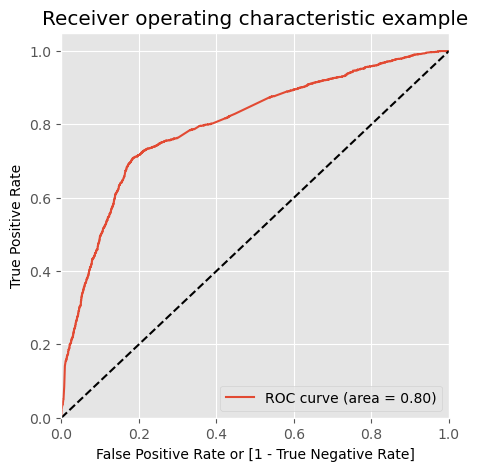

In [102]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [103]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.23,0,1,1,1,0,0,0,0,0,0,0
1,0,0.31,0,1,1,1,1,0,0,0,0,0,0
2,0,0.26,0,1,1,1,0,0,0,0,0,0,0
3,0,0.63,1,1,1,1,1,1,1,1,0,0,0
4,0,0.23,0,1,1,1,0,0,0,0,0,0,0


In [104]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.43   0.99   0.08
0.20  0.20      0.56   0.91   0.35
0.30  0.30      0.76   0.73   0.77
0.40  0.40      0.77   0.68   0.83
0.50  0.50      0.76   0.57   0.87
0.60  0.60      0.74   0.47   0.91
0.70  0.70      0.72   0.35   0.94
0.80  0.80      0.68   0.22   0.97
0.90  0.90      0.67   0.14   0.99


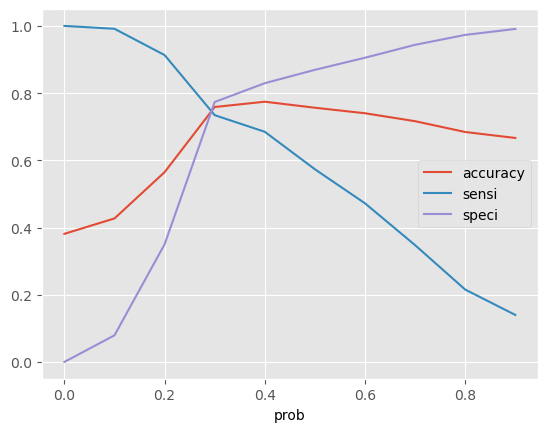

In [105]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.23,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.31,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.26,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.63,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.23,0,1,1,1,0,0,0,0,0,0,0,0


In [107]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7677798392084106

In [108]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3366,  636],
       [ 866, 1600]], dtype=int64)

In [109]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Calculate Sensitivity

TP/(TP+FN)

0.64882400648824

In [111]:
# Calculate Specificity

TN/(TN+FP)

0.841079460269865

In [112]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Management Specializations,occupation_Unemployed,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
4269,0,8,1011,8.00,0,0,0,0,0,0,0,0,1,0,0
2376,0,0,0,0.00,0,0,0,0,0,0,1,1,1,1,0
7766,0,5,59,5.00,0,0,1,0,0,0,0,1,0,0,1
9199,0,0,0,0.00,0,0,0,1,0,0,0,1,1,1,0
4359,0,0,0,0.00,0,0,0,0,0,0,1,1,1,0,1


In [113]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [114]:
# Check X_test_sm

X_test_sm

,const,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Management Specializations,occupation_Unemployed,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
4269,1.00,0,8,1011,8.00,0,0,0,0,0,0,0,0,1,0,0
2376,1.00,0,0,0,0.00,0,0,0,0,0,0,1,1,1,1,0
7766,1.00,0,5,59,5.00,0,0,1,0,0,0,0,1,0,0,1
9199,1.00,0,0,0,0.00,0,0,0,1,0,0,0,1,1,1,0
4359,1.00,0,0,0,0.00,0,0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.00,0,15,290,1.50,0,1,0,0,0,0,0,1,1,0,0
2152,1.00,0,0,0,0.00,0,0,1,0,0,0,0,1,1,0,1
7101,1.00,0,0,0,0.00,0,0,0,1,0,0,0,1,1,0,0
5331,1.00,1,3,1608,3.00,1,1,0,0,0,0,0,0,1,0,0


In [115]:
# Drop the required columns from X_test as well

X_test.drop(['lead_source_Reference'], 1, inplace = True)

In [116]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [117]:
y_test_pred[:10]

4269   1.00
2376   0.96
7766   1.00
9199   0.98
4359   0.96
9186   1.00
1631   1.00
8963   1.00
8007   1.00
5324   1.00
dtype: float64

In [118]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's see the head

y_pred_1.head()

,0
4269,1.00
2376,0.96
7766,1.00
9199,0.98
4359,0.96


In [120]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [121]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
# Check 'y_pred_final'

y_pred_final.head()

,converted,0
0,1,1.00
1,1,0.96
2,1,1.00
3,0,0.98
4,1,0.96


In [124]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [125]:
# Let's see the head of y_pred_final

y_pred_final.head()

,converted,Conversion_Prob
0,1,1.00
1,1,0.96
2,1,1.00
3,0,0.98
4,1,0.96


In [126]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [127]:
# Check y_pred_final

y_pred_final.head()

,converted,Conversion_Prob,final_predicted
0,1,1.00,1
1,1,0.96,1
2,1,1.00,1
3,0,0.98,1
4,1,0.96,1


In [128]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.41125541125541126

In [129]:
confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[  90, 1587],
       [  45, 1050]], dtype=int64)

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Calculate sensitivity
TP / float(TP+FN)

0.958904109589041

In [132]:
# Calculate specificity
TN / float(TN+FP)

0.05366726296958855

In [133]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3479,  523],
       [1052, 1414]], dtype=int64)

In [134]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7299948373773877

In [135]:
##### Recall
TP / TP + FN

46.0

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

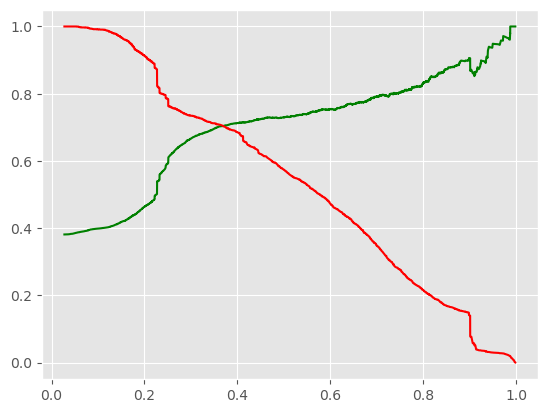

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.23,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.31,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.26,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.63,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.23,0,1,1,1,0,0,0,0,0,0,0,0


In [141]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7676252319109462

In [142]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3398,  604],
       [ 899, 1567]], dtype=int64)

In [143]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Calculate Precision

TP/(TP+FP)

0.7217871948410871

In [145]:
# Calculate Recall

TP/(TP+FN)

0.6354420113544201

In [146]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [147]:
y_test_pred[:10]

4269   1.00
2376   0.96
7766   1.00
9199   0.98
4359   0.96
9186   1.00
1631   1.00
8963   1.00
8007   1.00
5324   1.00
dtype: float64

In [148]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [149]:
# Let's see the head

y_pred_1.head()

,0
4269,1.00
2376,0.96
7766,1.00
9199,0.98
4359,0.96


In [150]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [151]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
# Check 'y_pred_final'

y_pred_final.head()

,converted,0
0,1,1.00
1,1,0.96
2,1,1.00
3,0,0.98
4,1,0.96


In [154]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [155]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [156]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [157]:
# Check 'y_pred_final'

y_pred_final.head()

,converted,0
0,1,1.00
1,1,0.96
2,1,1.00
3,0,0.98
4,1,0.96


In [158]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [159]:
# Let's see the head of y_pred_final

y_pred_final.head()

,converted,Conversion_Prob
0,1,1.00
1,1,0.96
2,1,1.00
3,0,0.98
4,1,0.96


In [160]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [161]:
# Check y_pred_final

y_pred_final.head()

,converted,Conversion_Prob,final_predicted
0,1,1.00,1
1,1,0.96,1
2,1,1.00,1
3,0,0.98,1
4,1,0.96,1


In [162]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.4126984126984127

In [163]:
# Calculate Recall

TP/(TP+FN)

0.6354420113544201